In [1]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np

import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
# now we would like to try to show a picture of Rihanna. You can replace the path below with your own path. 

In [11]:

path='C:\\Users\\mirzadsr\\Python Projects\\cropped\\katy perry\katy perry images - Google Search24.png'

image = cv2.imread(path)


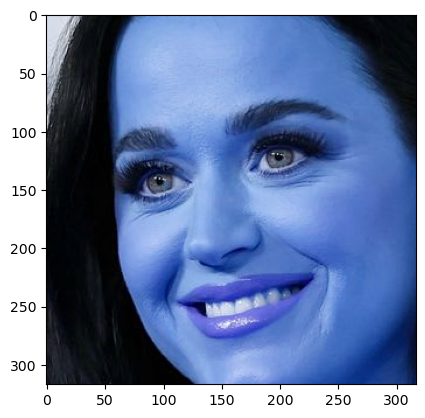

In [12]:
plt.imshow(image)

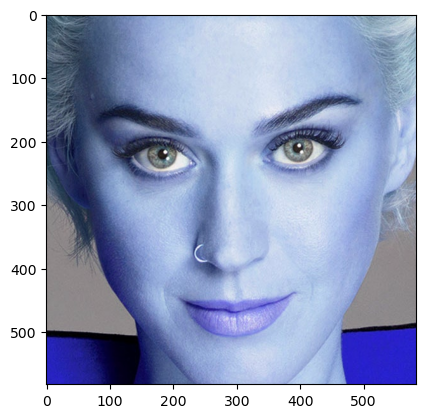

In [13]:
path="C:\\Users\\mirzadsr\\Python Projects\\cropped\\katy perry\\katy perry images - Google Search4.png"

image = cv2.imread(path)

plt.imshow(image)

In [14]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray.shape

(583, 583)

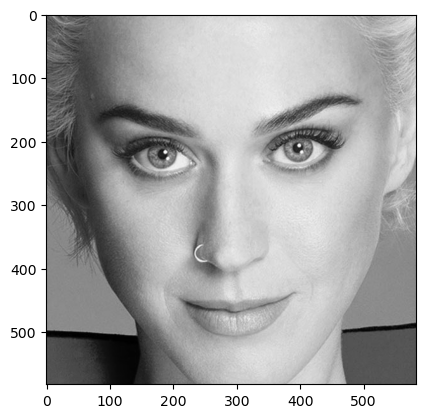

In [7]:
#now we see the balck and white version of the above picture 
plt.imshow(gray, cmap='gray')

In [15]:
#you need to find the following files from your own python directory 
face_cas = cv2.CascadeClassifier('C:\\Users\\mirzadsr\\AppData\\Roaming\\Python\\Python311\\site-packages\\cv2\\data\\haarcascade_frontalface_default.xml')
eye_cas= cv2.CascadeClassifier("C:\\Users\\mirzadsr\\AppData\\Roaming\\Python\\Python311\\site-packages\\cv2\\data\\\\haarcascade_eye.xml")



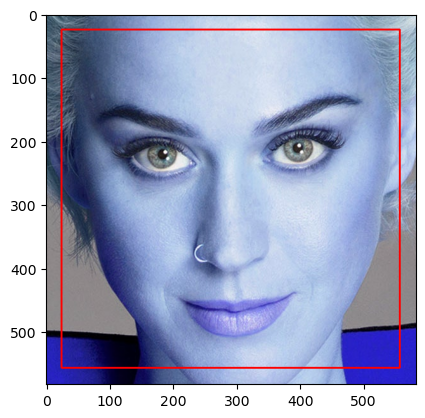

In [16]:
faces = face_cas.detectMultiScale(gray, 1.3, 2)
(x,y,w,h) = faces[0]
x,y,w,h
face_img = cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

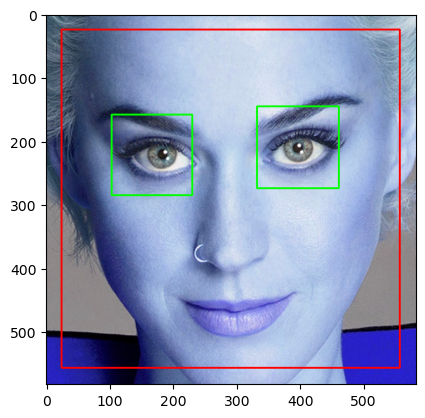

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cas.detectMultiScale(roi_gray)
    
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)


plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

In [18]:
import numpy as np
import pywt
import cv2

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)
    imArray /= 255;
    # compute coefficients
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)
    coeffs_H[0] *= 0;

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

# Preprocessing

We use this python function which takes the picture and return cropped image if more than 2 eyes are detected:


In [88]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                  
    
    faces = face_cas.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
             roi_gray = gray[y:y+h, x:x+w]
             roi_color = img[y:y+h, x:x+w]
             eyes = eye_cas.detectMultiScale(roi_gray)
             if len(eyes) >= 2:
                return roi_color
            
    
        
            
       
        
    

For example consider the follwing image:

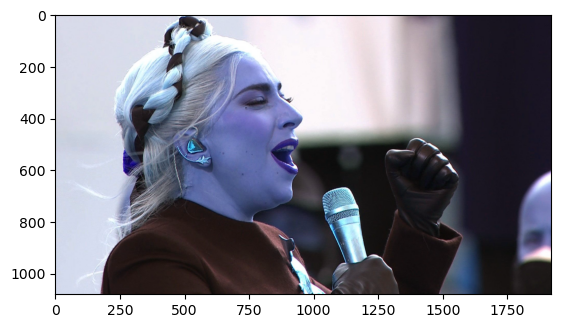

In [62]:
path="C:\\Users\\mirzadsr\Python Projects\\cropped\\210120113951-12-biden-inauguration-grab-lady-gaga.jpg"
image=cv2.imread(path)
plt.imshow(image)

In [63]:
print(get_cropped_image_if_2_eyes(path))




None


As you can see the function returns None, becasue in the above picture two eyes are not detected. However in the picture below, we will see that our function will return the cropped image, since 2 eyes are detected.

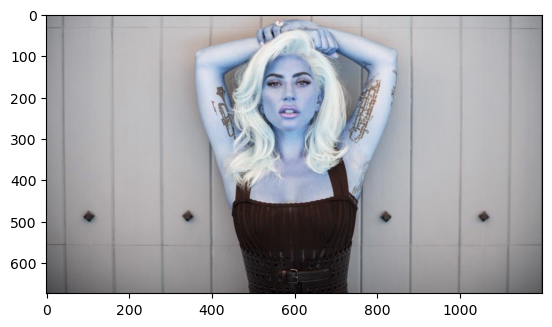

In [48]:
path="C:\\Users\\mirzadsr\\Python Projects\\cropped\\_url=https_3A_2F_2Fcalifornia-times-brightspot.s3.amazonaws.jpg"

image=cv2.imread(path)
plt.imshow(image)

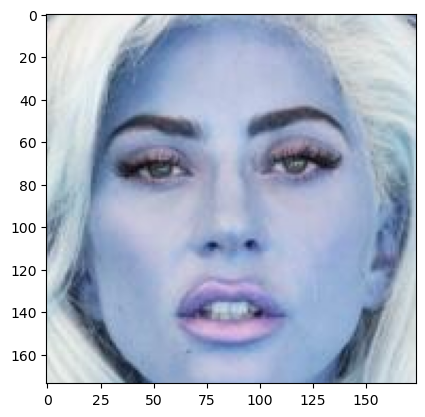

In [51]:
plt.imshow(get_cropped_image_if_2_eyes(path))
    

Next, we apply the function w2d which we defined earlier which applies the wavewlet transform to the picture:

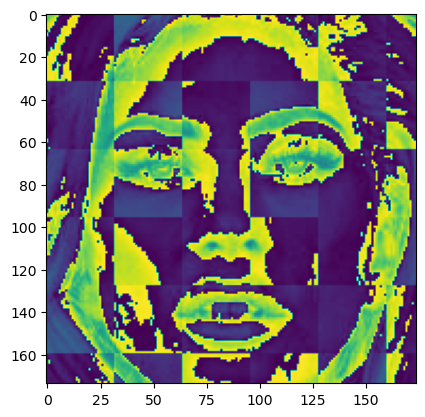

In [53]:
img_har = w2d(get_cropped_image_if_2_eyes(path),'db1',5)
plt.imshow(img_har)

Now we would like to utilize our function by going through all the pictures of Rihanna, Katy Perry, Lady Gaga, and Beyonce which we downloaded using fatcun.

In [96]:
#replace it with the right path in your local computer
path_to_data = "C:\\Users\\mirzadsr\\Python Projects\\Women Celebrity"



In [100]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [105]:
img_dirs

['C:\\Users\\mirzadsr\\Python Projects\\Women Celebrity\\beyonce pictures - Google Search',
 'C:\\Users\\mirzadsr\\Python Projects\\Women Celebrity\\katy perry images - Google Search',
 'C:\\Users\\mirzadsr\\Python Projects\\Women Celebrity\\lady gaga pictures - Google Search',
 'C:\\Users\\mirzadsr\\Python Projects\\Women Celebrity\\Rihanna images - Google Search']

In [102]:
def process_images(img_dirs):
    for dir_path in img_dirs:
        # Create a new directory for cropped images
        cropped_dir_path = f"{dir_path}_cropped"
        if not os.path.exists(cropped_dir_path):
            os.makedirs(cropped_dir_path)

        # Process each image in the directory
        for filename in os.listdir(dir_path):
            if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_path = os.path.join(dir_path, filename)
                cropped_image = get_cropped_image_if_2_eyes(image_path)
                
                # Save the cropped image
                if cropped_image is not None:
                    cv2.imwrite(os.path.join(cropped_dir_path, filename), cropped_image)


In [103]:
process_images(img_dirs)

In [18]:
#replace with the address on your computer of the cropped folders that were created after running the previous cell
cropped_image_dirs=["C:\\Users\\mirzadsr\\Python Projects\\Women Celebrity\\beyonce pictures - Google Search_cropped",
 'C:\\Users\\mirzadsr\\Python Projects\\Women Celebrity\\katy perry images - Google Search_cropped', 'C:\\Users\\mirzadsr\\Python Projects\\Women Celebrity\\lady gaga pictures - Google Search_cropped', 'C:\\Users\\mirzadsr\\Python Projects\\Women Celebrity\\Rihanna images - Google Search_cropped']

In [108]:
import os

cropped_image_dirs = [
    "C:\\Users\\mirzadsr\\Python Projects\\Women Celebrity\\beyonce pictures - Google Search_cropped",
    'C:\\Users\\mirzadsr\\Python Projects\\Women Celebrity\\katy perry images - Google Search_cropped',
    'C:\\Users\\mirzadsr\\Python Projects\\Women Celebrity\\lady gaga pictures - Google Search_cropped',
    'C:\\Users\\mirzadsr\\Python Projects\\Women Celebrity\\Rihanna images - Google Search_cropped'
]

celebrity_file_names_dict = {}

for dir_path in cropped_image_dirs:
    # Extracting singer's name from directory path
    basename = os.path.basename(dir_path)
    if 'katy perry' in basename.lower():
        singer_name = 'Katy Perry'
    elif 'lady gaga' in basename.lower():
        singer_name = 'Lady Gaga'
    else:
        singer_name = basename.split(' ')[0]  # Assumes the singer's name is the first word in the folder name for other cases

    # List all image files in the directory
    image_files = [os.path.join(dir_path, file) for file in os.listdir(dir_path) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

    # Adding to dictionary
    celebrity_file_names_dict[singer_name] = image_files

# Print the dictionary to verify
for singer, files in celebrity_file_names_dict.items():
    print(f"{singer}: {files[:3]}")  # Print first 3 file paths for brevity


beyonce: ['C:\\Users\\mirzadsr\\Python Projects\\Women Celebrity\\beyonce pictures - Google Search_cropped\\02-Beyonce-RENAISSANCE-WORLD-TOUR-Opening-Night-may-2023-billboard-1548.jpg', 'C:\\Users\\mirzadsr\\Python Projects\\Women Celebrity\\beyonce pictures - Google Search_cropped\\03grammys-walkup-bey-swap-tqfh-superJumbo.jpg', 'C:\\Users\\mirzadsr\\Python Projects\\Women Celebrity\\beyonce pictures - Google Search_cropped\\1172868864f73879981c71.36222106_.jpg']
Katy Perry: ['C:\\Users\\mirzadsr\\Python Projects\\Women Celebrity\\katy perry images - Google Search_cropped\\030223_GFlores_PMC_015.jpg', 'C:\\Users\\mirzadsr\\Python Projects\\Women Celebrity\\katy perry images - Google Search_cropped\\091095a103fb-katy-perry-russell-brand.jpg', 'C:\\Users\\mirzadsr\\Python Projects\\Women Celebrity\\katy perry images - Google Search_cropped\\10212271.jpg']
Lady Gaga: ['C:\\Users\\mirzadsr\\Python Projects\\Women Celebrity\\lady gaga pictures - Google Search_cropped\\0x0.jpg', 'C:\\Users\

In [109]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'beyonce': 0, 'Katy Perry': 1, 'Lady Gaga': 2, 'Rihanna': 3}

# Training the model

In [110]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [114]:
X

array([[ 82., 136., 191., ..., 254., 248., 186.],
       [ 19.,  47.,  73., ...,  13.,  12.,   0.],
       [244., 234., 210., ..., 199.,  25.,  26.],
       ...,
       [ 29.,  29.,  29., ...,  25.,  34.,   1.],
       [194., 199., 202., ..., 229.,   1.,   4.],
       [ 94.,  80.,  82., ...,  48., 251., 111.]])

In [115]:
len(X[0])

4096

In [116]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(170, 4096)

In [13]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
model=SVC(kernel='rbf',C=10)
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)


0.8

In [16]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.73      0.80      0.76        10
           1       0.69      0.82      0.75        11
           2       0.89      0.80      0.84        10
           3       0.92      0.79      0.85        14

    accuracy                           0.80        45
   macro avg       0.81      0.80      0.80        45
weighted avg       0.81      0.80      0.80        45



In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier







classifiers = {
    "Random Forest": (RandomForestClassifier(),
                       {'n_estimators': [10, 50, 100],
                        'max_depth': [None, 10, 20, 30]}),

    "SVM": (SVC(),
            {'C': [0.1, 1, 10, 1000],
             'kernel': ['linear', 'rbf']}),

    "Logistic Regression": (LogisticRegression(),
                            {'C': [0.1, 1, 10],
                             'penalty': ['l1', 'l2']}),

    "K-Nearest Neighbors": (KNeighborsClassifier(),
                            {'n_neighbors': [3, 5, 7],
                             'weights': ['uniform', 'distance']}),

    "Decision Tree": (DecisionTreeClassifier(),
                      {'max_depth': [None, 10, 20, 30],
                       'min_samples_split': [2, 5, 10]})

}


In [21]:
# Create an empty DataFrame to store results
import pandas as pd
results_df = pd.DataFrame(columns=['Model', 'Best Parameters', 'Best Score'])

# Loop through the classifiers and perform GridSearchCV
scaler = StandardScaler()

# Scale the training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Loop through the classifiers and perform GridSearchCV
for name, (model, param_grid) in classifiers.items():
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X_train_scaled, y_train)
    y_pred = grid_search.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(classification_report(y_test, y_pred))

    # Store results in the DataFrame
    results_df = results_df.append({'Model': name, 'Best Parameters': grid_search.best_params_, 'Best Score': accuracy}, ignore_index=True)
    print(results_df)

# Sort the DataFrame by the best score in descending order
results_df = results_df.sort_values(by='Best Score', ascending=False)

# Display the results
print(results_df)












              precision    recall  f1-score   support

           0       0.73      0.80      0.76        10
           1       0.64      0.82      0.72        11
           2       0.78      0.70      0.74        10
           3       0.91      0.71      0.80        14

    accuracy                           0.76        45
   macro avg       0.76      0.76      0.75        45
weighted avg       0.77      0.76      0.76        45

           Model                         Best Parameters  Best Score
0  Random Forest  {'max_depth': 10, 'n_estimators': 100}    0.755556


C:\Users\local_mirzadsr\Temp\ipykernel_7884\3844184962.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': name, 'Best Parameters': grid_search.best_params_, 'Best Score': accuracy}, ignore_index=True)


              precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.73      0.73      0.73        11
           2       1.00      0.90      0.95        10
           3       0.85      0.79      0.81        14

    accuracy                           0.82        45
   macro avg       0.83      0.83      0.83        45
weighted avg       0.83      0.82      0.82        45

           Model                         Best Parameters  Best Score
0  Random Forest  {'max_depth': 10, 'n_estimators': 100}    0.755556
1            SVM          {'C': 0.1, 'kernel': 'linear'}    0.822222


C:\Users\local_mirzadsr\Temp\ipykernel_7884\3844184962.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': name, 'Best Parameters': grid_search.best_params_, 'Best Score': accuracy}, ignore_index=True)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.67      0.73      0.70        11
           2       0.88      0.70      0.78        10
           3       0.71      0.71      0.71        14

    accuracy                           0.76        45
   macro avg       0.77      0.76      0.76        45
weighted avg       0.76      0.76      0.76        45

                 Model                         Best Parameters  Best Score
0        Random Forest  {'max_depth': 10, 'n_estimators': 100}    0.755556
1                  SVM          {'C': 0.1, 'kernel': 'linear'}    0.822222
2  Logistic Regression             {'C': 0.1, 'penalty': 'l2'}    0.755556
              precision    recall  f1-score   support

           0       0.83      0.50      0.62        10
           1       0.56      0.45      0.50        11
           2       0.73      0.80      0.76        10
           3       0.68      0.93      0.79     

C:\Users\local_mirzadsr\Temp\ipykernel_7884\3844184962.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': name, 'Best Parameters': grid_search.best_params_, 'Best Score': accuracy}, ignore_index=True)


              precision    recall  f1-score   support

           0       0.40      0.40      0.40        10
           1       0.44      0.73      0.55        11
           2       0.62      0.50      0.56        10
           3       0.67      0.43      0.52        14

    accuracy                           0.51        45
   macro avg       0.53      0.51      0.51        45
weighted avg       0.54      0.51      0.51        45

                 Model                            Best Parameters  Best Score
0        Random Forest     {'max_depth': 10, 'n_estimators': 100}    0.755556
1                  SVM             {'C': 0.1, 'kernel': 'linear'}    0.822222
2  Logistic Regression                {'C': 0.1, 'penalty': 'l2'}    0.755556
3  K-Nearest Neighbors  {'n_neighbors': 3, 'weights': 'distance'}    0.688889
4        Decision Tree  {'max_depth': 10, 'min_samples_split': 2}    0.511111
                 Model                            Best Parameters  Best Score
1                  

C:\Users\local_mirzadsr\Temp\ipykernel_7884\3844184962.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': name, 'Best Parameters': grid_search.best_params_, 'Best Score': accuracy}, ignore_index=True)


In [30]:
results_df['Best Parameters'][1]

{'C': 0.1, 'kernel': 'linear'}

In [28]:


model=Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'linear', C = 0.1, probability=True))])

In [29]:
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(C=0.1, kernel='linear', probability=True))])

In [30]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.73      0.73      0.73        11
           2       1.00      0.90      0.95        10
           3       0.85      0.79      0.81        14

    accuracy                           0.82        45
   macro avg       0.83      0.83      0.83        45
weighted avg       0.83      0.82      0.82        45



In [31]:
import pickle
with open('model_pickle','wb') as f:
    pickle.dump(model,f)